In [ ]:
!pip install jovian --upgrade --quiet

## Project on CIFAR10
### The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class

In [ ]:
# Importing Libraries
import torch                       # pytorch
import torch.nn as nn              # pytorch for neural network
import numpy as np                 # for algebric functions
import matplotlib.pyplot as plt    # to plot graph

# torch vision package
import torchvision                 # for handling image & has CNN architecture



In [ ]:
trainset = torchvision.datasets.CIFAR10(train=True,download=True,root= "./data",
                                     transform= torchvision.transforms.ToTensor())
#transform --> transform the data during creation (ToTensor())
#download  --> to download to local file
#root      --> data storage place
#train     --> means training data from training set 
type(trainset)

In [52]:
project_name = 'courseproject'

In [ ]:
#class labels [there are 10 lables]
#this is the order of lable of this dataset
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship',' truck' )

# Data Loader

In [5]:
#loading the dataset --> DataLoader class (torch.utils.data.DataLoader)
trainloader = torch.utils.data.DataLoader(trainset)
type(trainloader)

torch.utils.data.dataloader.DataLoader

In [6]:
data_iter = iter(trainloader)
type(data_iter)

torch.utils.data.dataloader._SingleProcessDataLoaderIter

In [7]:
#Access the data --> next() method
images,labels = data_iter.next()
print(images.shape)

torch.Size([1, 3, 32, 32])


In [8]:
print(labels)
print(labels.item())
print(classes[labels.item()])

tensor([6])
6
frog


In [9]:
#Specifying batch_size, Shuffle & load data in paralell using multiprocessing workers
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True)

data_iter = iter(trainloader)
images,labels = data_iter.next()

In [10]:
print(images.shape)

torch.Size([4, 3, 32, 32])


In [11]:
print(labels)
print([i.item() for i in labels])
print([classes[i.item()] for i in labels])

tensor([7, 5, 2, 5])
[7, 5, 2, 5]
['horse', 'dog', 'bird', 'dog']


# Data Visualization

In [12]:
img_data = images[0]
img_data.shape

torch.Size([3, 32, 32])

In [13]:
# tensor image shape format must be like [32,32,3] not like [3,32,32]. so we need to convert it.
#we can't do this in tensor. so, we are going to use numpy

np_image = img_data.numpy()                      #converting tensor --> numpy
np_image = np.transpose(np_image, (1,2,0))         #transform
print(np_image.shape)

(32, 32, 3)


horse


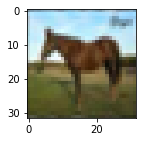

In [14]:
#plotting the image
plt.figure(figsize = (2,2))
plt.imshow(np_image)
print(classes[labels[0].item()])
plt.show()

In [15]:
# creating function to view image
def image_show(image_data):
  np_image = image_data.numpy()
  np_image = np.transpose(np_image, (1,2,0))
  plt.figure(figsize = (2,2))
  plt.imshow(np_image)
  plt.show()

bird


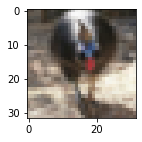

In [16]:
print(classes[labels[2].item()])
image_show(images[2])

In [17]:
class FirstNN(nn.Module):
  def __init__(self):
    super(FirstNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3)  #(no. of input channels, number of output channels, kernel size)
    # kernel size --> 3 = (3,3)

  def forward(self,x):
    return self.conv1(x)

In [18]:
cnn = FirstNN()
out = cnn(images)
print(out.shape)

torch.Size([4, 10, 30, 30])


torch.Size([30, 30])


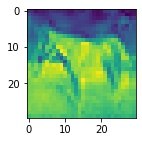

In [19]:
#image after convolution
sample = out[0,0,:,:]
print(sample.shape)
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

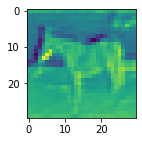

In [20]:
#2nd filter
sample = out[0,1,:,:]
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

# Deep Neural Network

In [21]:
class DeepCNN(nn.Module):
  def __init__(self):
    super(DeepCNN,self).__init__()
    self.model = nn.Sequential(nn.Conv2d(3,10,3),
                               nn.Conv2d(10,5,3))
  def forward(self,x):
    return self.model(x)

torch.Size([4, 5, 28, 28])


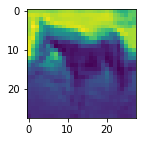

In [22]:
deep = DeepCNN()
out = deep(images)
print(out.shape)

sample = out[0,1,:,:]
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

In [23]:
#Mean Pool or Avg pool
class avg_pool(nn.Module):
    def __init__(self):
        super(avg_pool,self).__init__()
        self.model = nn.Sequential(nn.Conv2d(3,10,3),
                                  nn.Conv2d(10,5,3),
                                  nn.AvgPool2d(2, stride = 2)) # Kernel size, Stride
        #Stride = 2 --> (2,2)

    def forward(self,x):
        y = self.model(x)
        return y

torch.Size([4, 5, 14, 14])


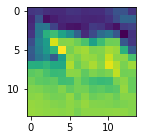

In [25]:
avg = avg_pool()
out = avg(images)
print(out.shape)

sample = out[0,1,:,:]
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

In [26]:
#Max Pool
class max_pool(nn.Module):
    def __init__(self):
        super(max_pool,self).__init__()
        self.model = nn.Sequential(nn.Conv2d(3,10,3),
                                  nn.Conv2d(10,5,3),
                                  nn.MaxPool2d(2, stride = 2)) # Kernel size, Stride
        #Stride = 2 --> (2,2)

    def forward(self,x):
        y = self.model(x)
        return y

torch.Size([4, 5, 14, 14])


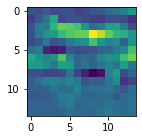

In [28]:
max_p = max_pool()
out = max_p(images)
print(out.shape)

sample = out[0,1,:,:]
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

# Using LENET 

In [29]:
class LeNET(nn.Module):
    def __init__(self):
        super(LeNET,self).__init__()
        self.conv_model = nn.Sequential(nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5),   # (N,3,32,32) --> (N,6,28,28) 
                                        nn.Tanh(),                                               # TanH --> Activation Function
                                        nn.AvgPool2d(kernel_size=2,stride=2),                    # (N,6,28,28) --> (N,6,14,14)
                                        nn.Conv2d(6,16,5),nn.Tanh(),                             # (N,6,14,14) --> (N,16,10,10)
                                        nn.AvgPool2d(2,stride=2))                                # (N,16,10,10) --> (N,16,5,5)

        #Dense Layer
        self.dense_layer = nn.Sequential(nn.Linear(in_features=400,out_features=120),           #16*5*5 = 400 as input
                                         nn.Tanh(),
                                         nn.Linear(120,84),
                                         nn.Tanh(),
                                     nn.Linear(84,10))
    def forward(self,x):
        y = self.conv_model(x)
        #flatten the result from Conv model
        y = torch.flatten(y,1) # 1 --> dimension (N,16,5,5)
        y = self.dense_layer(y)
        return y

In [30]:
#understanding of torch.flattern
x = torch.randn(6,50,50)
print("Starts from index 0  :",torch.flatten(x).shape)
print("Starts from index 1  :",torch.flatten(x,1).shape)
print("Starts from index 2  :",torch.flatten(x,2).shape)

Starts from index 0  : torch.Size([15000])
Starts from index 1  : torch.Size([6, 2500])
Starts from index 2  : torch.Size([6, 50, 50])


In [31]:
#define batch size
batch = 256

#create new train & test data with new batch size
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = torchvision.transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch, shuffle = True)

testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = torchvision.transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size = batch, shuffle = False)
#Setting the testloader with shuffle as False to measure test accuracy

Files already downloaded and verified
Files already downloaded and verified


In [32]:
net = LeNET() 
# defining Loss function
loss_func = nn.CrossEntropyLoss()
# defining optimizer
optimizer = torch.optim.Adam(net.parameters()) 

In [40]:
def model_eval(dataloader):
    total = 0
    correct = 0
    for data in dataloader:
        images, lables = data
        out = net(images)
        max_val, preds = torch.max(out,dim=1)
        #accuracy = (correctly predicted class / total testing class) × 100%
        total += lables.shape[0]                   # class value 
        correct += (preds == lables).sum().item()  # to summ correct in the batch then sum all of it
        accuracy = (100 * correct)/total
        return accuracy  

# Evaluating the model

In [48]:
epoch = 10

for i in range(epoch):

      for data in trainloader:
        image_data , labels = data
        optimizer.zero_grad() 
        out = net(image_data) #image_data --> input data

train_acc = model_eval(trainloader) 
test_acc  = model_eval(testloader)

print("Epoch :",i," Train Accuracy : ",train_acc," Test Accuracy : ",test_acc)

Epoch : 9  Train Accuracy :  9.375  Test Accuracy :  10.15625


In [49]:
!pip install jovian --upgrade --quiet

In [53]:
import jovian

In [54]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Uploading notebook to https://jovian.ml/venukodandaram/courseproject


<IPython.core.display.Javascript object>